In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("selected_5000.csv")
df_test = pd.read_csv("predicted_actives_gbm.csv")

df_train

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,Activity
0,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.52356,-0.864904,0.333333,3.134230,0
1,0,0,0,2,1,0,0,0,0,0,...,0,1,0,0,0,4.85798,-0.686336,0.000000,1.622290,0
2,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,5.42626,-0.349615,0.342857,1.521120,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,4.24793,0.002651,0.000000,0.343511,0
4,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,4.80735,-0.656633,0.260870,2.025720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.24800,-0.798000,0.414000,3.011000,1
5352,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.20900,-0.790000,0.429000,2.788000,1
5353,1,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,4.90700,-0.717000,0.240000,3.179000,1
5354,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,5.55500,-0.767000,0.514000,4.465000,1


In [90]:
#Removing low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

In [91]:
#Split dataset into training set and testing set
X = df_train
y = df_train['Activity']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [92]:
#Fit
_ = vt.fit(X_train)

In [93]:
#Get the mask
mask = vt.get_support()

In [94]:
#Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask]

In [95]:
df_train_2 = X_train
df_train_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
4434,1,0,1,7,1,10,1,6,21.0,14,...,1,2,0,0,1,0,0,0,0,1.19334
5229,2,1,4,22,6,6,10,12,54.0,17,...,0,0,0,1,0,0,0,3,1,1.02200
4223,1,1,2,11,3,8,5,6,34.0,19,...,0,1,0,1,0,0,1,2,1,2.13529
1417,3,1,3,19,7,13,1,18,45.0,26,...,0,4,0,1,1,0,0,0,0,2.65587
2399,0,0,2,5,4,3,3,0,31.0,23,...,0,0,0,1,0,0,0,2,0,3.49898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2,2,3,16,6,5,4,12,44.0,22,...,0,0,0,3,0,0,1,1,1,3.27223
3859,1,0,2,8,2,5,2,6,22.0,15,...,0,0,0,0,0,1,0,2,0,2.06639
559,1,1,2,8,3,3,2,6,26.0,18,...,0,0,0,0,0,0,0,0,0,2.30262
1298,2,0,2,15,2,13,3,12,37.0,21,...,0,1,1,0,1,0,0,0,0,2.22659


In [96]:
df_extract = df_train_2.iloc[:,0:358]
df_lev = df_train_2.iloc[:,0:358]
df_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
4434,1,0,1,7,1,10,1,6,21.0,14,...,1,2,0,0,1,0,0,0,0,1.19334
5229,2,1,4,22,6,6,10,12,54.0,17,...,0,0,0,1,0,0,0,3,1,1.02200
4223,1,1,2,11,3,8,5,6,34.0,19,...,0,1,0,1,0,0,1,2,1,2.13529
1417,3,1,3,19,7,13,1,18,45.0,26,...,0,4,0,1,1,0,0,0,0,2.65587
2399,0,0,2,5,4,3,3,0,31.0,23,...,0,0,0,1,0,0,0,2,0,3.49898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2,2,3,16,6,5,4,12,44.0,22,...,0,0,0,3,0,0,1,1,1,3.27223
3859,1,0,2,8,2,5,2,6,22.0,15,...,0,0,0,0,0,1,0,2,0,2.06639
559,1,1,2,8,3,3,2,6,26.0,18,...,0,0,0,0,0,0,0,0,0,2.30262
1298,2,0,2,15,2,13,3,12,37.0,21,...,0,1,1,0,1,0,0,0,0,2.22659


In [97]:
#Calculating the mean and standard deviations of train dataset
mean = df_extract.mean(axis=0)
std = df_extract.std(axis=0)
df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)
df_train_3

C:\Users\brian\AppData\Local\Temp\ipykernel_16176\3096718968.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_16176\3096718968.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
0,1.000000,0.000000,1.000000,7.000000,1.000000,10.000000,1.000000,6.000000,21.000000,14.000000,...,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.193340
1,2.000000,1.000000,4.000000,22.000000,6.000000,6.000000,10.000000,12.000000,54.000000,17.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.022000
2,1.000000,1.000000,2.000000,11.000000,3.000000,8.000000,5.000000,6.000000,34.000000,19.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,2.135290
3,3.000000,1.000000,3.000000,19.000000,7.000000,13.000000,1.000000,18.000000,45.000000,26.000000,...,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.655870
4,0.000000,0.000000,2.000000,5.000000,4.000000,3.000000,3.000000,0.000000,31.000000,23.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.498980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,1.000000,1.000000,2.000000,8.000000,3.000000,3.000000,2.000000,6.000000,26.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.302620
4282,2.000000,0.000000,2.000000,15.000000,2.000000,13.000000,3.000000,12.000000,37.000000,21.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.226590
4283,1.000000,3.000000,1.000000,12.000000,5.000000,10.000000,6.000000,6.000000,40.000000,20.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.990410
4284,1.390289,0.832866,2.157563,12.138189,3.762605,8.035014,3.760738,8.311158,34.757353,18.838469,...,0.394958,0.661298,0.409430,0.477591,0.280112,0.172502,0.395191,0.947479,0.342204,2.183422


In [116]:
#Standardisation of descriptor values
df_train_4 = df_lev.iloc[:, :] - df_train_3.iloc[4284]
df_train_5 = df_train_4.abs()/ df_train_3.iloc[4284]
df_train_5['mean'] = df_train_5.mean(axis=1)
df_train_5['std'] = df_train_5.std(axis=1)
df_train_5['leverages'] = (df_train_5['mean'] + 1.28) * df_train_5['std']
df_train_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
4434,0.280725,1.000000,0.536514,0.423308,0.734227,0.244553,0.734095,0.278079,0.395811,0.256840,...,1.000000,2.57,1.000000,1.000000,1.000000,1.000000,0.453454,0.604252,0.560478,1.056081
5229,0.438549,0.200673,0.853944,0.812462,0.594640,0.253268,1.659053,0.443842,0.553628,0.097591,...,1.093842,1.00,1.000000,1.000000,2.166297,1.922237,0.531927,0.879232,1.741398,3.760083
4223,0.280725,0.200673,0.073028,0.093769,0.202680,0.004358,0.329526,0.278079,0.021790,0.008575,...,1.093842,1.00,1.000000,1.530419,1.110865,1.922237,0.022044,0.326195,0.422670,0.678890
1417,1.157824,0.200673,0.390458,0.565308,0.860413,0.617919,0.734095,1.165763,0.294690,0.380155,...,1.093842,2.57,1.000000,1.000000,1.000000,1.000000,0.216380,0.655780,0.739429,1.431372
2399,1.000000,1.000000,0.073028,0.588077,0.063093,0.626634,0.202284,1.000000,0.108102,0.220906,...,1.093842,1.00,1.000000,1.000000,1.110865,1.000000,0.602521,0.705236,2.967483,5.891155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,0.438549,1.401345,0.390458,0.318154,0.594640,0.377724,0.063621,0.443842,0.265919,0.167823,...,5.281525,1.00,1.000000,1.530419,0.055432,1.922237,0.498670,0.555883,0.572686,1.051385
3859,0.280725,1.000000,0.073028,0.340923,0.468453,0.377724,0.468189,0.278079,0.367040,0.203757,...,1.000000,1.00,4.797023,1.000000,1.110865,1.000000,0.053600,0.647957,0.595304,1.147720
559,0.280725,0.200673,0.073028,0.340923,0.202680,0.626634,0.468189,0.278079,0.251957,0.044508,...,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,0.054592,0.494625,0.489470,0.868625
1298,0.438549,1.000000,0.073028,0.235769,0.468453,0.617919,0.202284,0.443842,0.064523,0.114740,...,1.000000,2.57,1.000000,1.000000,1.000000,1.000000,0.019771,0.426054,0.546328,0.932066


In [99]:
#Max values of descriptors
maxValues = df_train_5[df_train_5.max(axis = 1) > 3]
maxValues

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
4434,0.292596,1.000000,0.030318,0.590206,0.499174,2.080959,0.430415,0.308223,1.599475,1.303438,...,1.000000,0.991541,1.000000,1.000000,1.000000,1.00000,0.037321,2.153429,4.951260,16.999798
5229,1.585192,0.247905,3.121273,3.997791,2.004953,0.848575,4.695845,1.616445,5.684365,1.797032,...,0.392487,1.000000,1.000000,1.000000,2.000637,0.72442,0.175543,3.673448,5.180270,25.660198
4223,0.292596,0.247905,1.060636,1.498896,0.502477,1.464767,1.847923,0.308223,3.208674,2.126095,...,0.392487,1.000000,1.000000,0.718695,1.000424,0.72442,0.722559,2.552844,5.089824,19.508501
1417,2.877788,0.247905,2.090955,3.316274,2.505779,3.005246,0.430415,2.924668,4.570304,3.277814,...,0.392487,0.991541,1.000000,1.000000,1.000000,1.00000,1.142516,3.414195,5.052209,23.716053
2399,1.000000,1.000000,1.060636,0.135862,1.003302,0.075712,0.708754,1.000000,2.837321,2.784220,...,0.392487,1.000000,1.000000,1.000000,1.000424,1.00000,1.822662,2.492267,4.958677,18.705452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,1.585192,1.495810,2.090955,2.634757,2.004953,0.540479,1.278338,1.616445,4.446520,2.619689,...,3.177460,1.000000,1.000000,0.718695,0.000212,0.72442,1.639740,3.219879,5.092638,22.916252
3859,0.292596,1.000000,1.060636,0.817379,0.001651,0.540479,0.139169,0.308223,1.723260,1.467970,...,1.000000,1.000000,1.477967,1.000000,1.000424,1.00000,0.666977,2.176038,4.835062,16.710156
559,0.292596,0.247905,1.060636,0.817379,0.502477,0.075712,0.139169,0.308223,2.218398,1.961563,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.857546,2.315284,4.955244,17.815511
1298,1.585192,1.000000,1.060636,2.407585,0.001651,3.005246,0.708754,1.616445,3.580028,2.455157,...,1.000000,0.991541,1.000000,1.000000,1.000000,1.00000,0.796212,2.794649,5.049804,20.576179


In [100]:
df_train_6 = df_train_5.loc[df_train_5['leverages'] > 3]
df_train_6

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages
4434,0.292596,1.000000,0.030318,0.590206,0.499174,2.080959,0.430415,0.308223,1.599475,1.303438,...,1.000000,0.991541,1.000000,1.000000,1.000000,1.00000,0.037321,2.153429,4.951260,16.999798
5229,1.585192,0.247905,3.121273,3.997791,2.004953,0.848575,4.695845,1.616445,5.684365,1.797032,...,0.392487,1.000000,1.000000,1.000000,2.000637,0.72442,0.175543,3.673448,5.180270,25.660198
4223,0.292596,0.247905,1.060636,1.498896,0.502477,1.464767,1.847923,0.308223,3.208674,2.126095,...,0.392487,1.000000,1.000000,0.718695,1.000424,0.72442,0.722559,2.552844,5.089824,19.508501
1417,2.877788,0.247905,2.090955,3.316274,2.505779,3.005246,0.430415,2.924668,4.570304,3.277814,...,0.392487,0.991541,1.000000,1.000000,1.000000,1.00000,1.142516,3.414195,5.052209,23.716053
2399,1.000000,1.000000,1.060636,0.135862,1.003302,0.075712,0.708754,1.000000,2.837321,2.784220,...,0.392487,1.000000,1.000000,1.000000,1.000424,1.00000,1.822662,2.492267,4.958677,18.705452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,1.585192,1.495810,2.090955,2.634757,2.004953,0.540479,1.278338,1.616445,4.446520,2.619689,...,3.177460,1.000000,1.000000,0.718695,0.000212,0.72442,1.639740,3.219879,5.092638,22.916252
3859,0.292596,1.000000,1.060636,0.817379,0.001651,0.540479,0.139169,0.308223,1.723260,1.467970,...,1.000000,1.000000,1.477967,1.000000,1.000424,1.00000,0.666977,2.176038,4.835062,16.710156
559,0.292596,0.247905,1.060636,0.817379,0.502477,0.075712,0.139169,0.308223,2.218398,1.961563,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.857546,2.315284,4.955244,17.815511
1298,1.585192,1.000000,1.060636,2.407585,0.001651,3.005246,0.708754,1.616445,3.580028,2.455157,...,1.000000,0.991541,1.000000,1.000000,1.000000,1.00000,0.796212,2.794649,5.049804,20.576179


In [101]:
df_train_7 = df_train_6.loc[df_train_6['leverages'] < 3]
df_train_7

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D759,D761,D762,D763,D765,D770,D777,mean,std,leverages


In [102]:
df_test

,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,D488-0121,3,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.72792,-0.822058,0.461538,3.66371
1,D488-0114,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.70044,-0.816815,0.315789,3.33826
2,D305-0402,3,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.61471,-0.816815,0.473684,4.08437
3,F069-0210,2,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.706842,0.400000,2.58441
4,D420-2730,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.49185,-0.767101,0.342857,3.00023
5,D420-1684,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.42626,-0.785198,0.363636,3.54823
6,Z341-0197,1,0,0,2,3,0,0,0,0,...,0,0,0,0,0,0,5.61471,-0.744309,0.150000,1.45307
7,D488-0310,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.72792,-0.793711,0.307692,2.84712
8,D420-1970,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.45943,-0.792361,0.352941,3.49136
9,S343-1027,2,0,0,2,3,0,0,0,0,...,0,0,0,0,0,0,5.49185,-0.785198,0.363636,3.20774


In [103]:
df_test_extract = df_test.iloc[:,1:778]
df_test_lev = df_test.iloc[:,1:778]
df_test_extract

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.72792,-0.822058,0.461538,3.66371
1,2,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.70044,-0.816815,0.315789,3.33826
2,3,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.61471,-0.816815,0.473684,4.08437
3,2,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,5.28540,-0.706842,0.400000,2.58441
4,2,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.49185,-0.767101,0.342857,3.00023
5,2,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.42626,-0.785198,0.363636,3.54823
6,1,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,5.61471,-0.744309,0.150000,1.45307
7,2,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.72792,-0.793711,0.307692,2.84712
8,2,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,5.45943,-0.792361,0.352941,3.49136
9,2,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,5.49185,-0.785198,0.363636,3.20774


In [104]:
#Calculating the mean and standard deviations for test dataset
test_mean = df_test_extract.mean(axis=0)
test_std = df_test_extract.std(axis=0)
df_test_2 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_test_2 = df_test_2.append(pd.DataFrame([std]),ignore_index=True)
df_test_2

C:\Users\brian\AppData\Local\Temp\ipykernel_16176\3474028534.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_2 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_16176\3474028534.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_2 = df_test_2.append(pd.DataFrame([std]),ignore_index=True)


,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,3.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.72792,-0.822058,0.461538,3.663710
1,2.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.70044,-0.816815,0.315789,3.338260
2,3.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.61471,-0.816815,0.473684,4.084370
3,2.000000,0.0,0.0,0.000000,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.28540,-0.706842,0.400000,2.584410
4,2.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.49185,-0.767101,0.342857,3.000230
5,2.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.42626,-0.785198,0.363636,3.548230
6,1.000000,0.0,0.0,2.000000,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.61471,-0.744309,0.150000,1.453070
7,2.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.72792,-0.793711,0.307692,2.847120
8,2.000000,0.0,0.0,1.000000,4.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.45943,-0.792361,0.352941,3.491360
9,2.000000,0.0,0.0,2.000000,3.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,5.49185,-0.785198,0.363636,3.207740


In [105]:
#Standardisation of descriptors values
df_test_3 = df_test_lev.loc[:, :] - df_test_2.iloc[21]
df_test_4 = df_test_3.abs()/ df_test_2.iloc[21]
df_test_4['mean'] = df_test_4.mean(axis=1)
df_test_4['std'] = df_test_4.std(axis=1)
df_test_4['leverages'] = (df_test_4['mean'] + 1.28) * df_test_4['std']
df_test_4

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D771,D772,D773,D774,D775,D776,D777,mean,std,leverages
0,1.157824,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.677967,0.771101,0.928078,1.903582
1,0.438549,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.528912,0.721042,0.765595,1.531988
2,1.157824,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.870628,1.545361,10.944624,30.922519
3,0.438549,NaN,NaN,1.000000,0.390458,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.183651,0.507329,1.060815,1.896026
4,0.438549,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.374095,0.593391,0.625894,1.172544
5,0.438549,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.625077,0.533107,0.554963,1.006207
6,0.280725,NaN,NaN,1.401345,0.390458,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.334499,0.825884,0.747344,1.573819
7,0.438549,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.303971,0.767087,0.813933,1.666191
8,0.438549,NaN,NaN,0.200673,0.853944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.599031,0.561997,0.526525,0.969858
9,0.438549,NaN,NaN,1.401345,0.390458,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.469134,0.584535,0.751699,1.401569


In [121]:
#Calculate the Applicability Domain of a new test compound
new_test = df_test_4.iloc[[5]]
new_test.index
s_new = new_test['leverages']
s_new = round(s_new, 3)
print(s_new)
if (s_new > 3).any():
  print('outlier')
elif (s_new < 3).any():
  print('not outlier')

5    1.006
Name: leverages, dtype: float64
not outlier


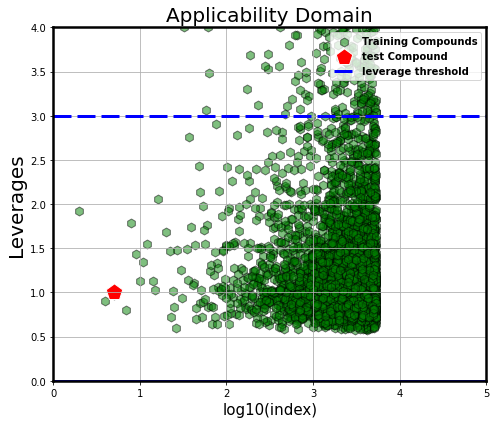

In [122]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}

plt.scatter(np.log10(df_train_5.index), df_train_5['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plt.scatter(np.log10(X_test.index), X_test['leverages'], c='red', s=80, alpha=0.5, label="Test Compounds",  marker="*", edgecolors='black')

plt.scatter(np.log10(new_test.index), new_test['leverages'], c='red', s=300, label="test Compound", marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0, 4)
plt.xlim(0, 5)
plt.grid()
fig.savefig('default2.png')